In [1]:
import csv 
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"C:\Users\Home\Documents\athlete_events.csv")
regions = pd.read_csv(r"C:\Users\Home\Documents\regions.csv")

In [4]:
merged = pd.merge(data, regions, on='NOC', how='left')


# Performance of Female Atheletes in Olympics

In [5]:
Olympics = merged[(merged.Sex == 'F') & (merged.Season == 'Summer')]
Olympic = merged[(merged.Sex == 'F') & (merged.Season == 'Winter')]

Text(0.5,1,'Women won medals in the Winter Olympics Games ')

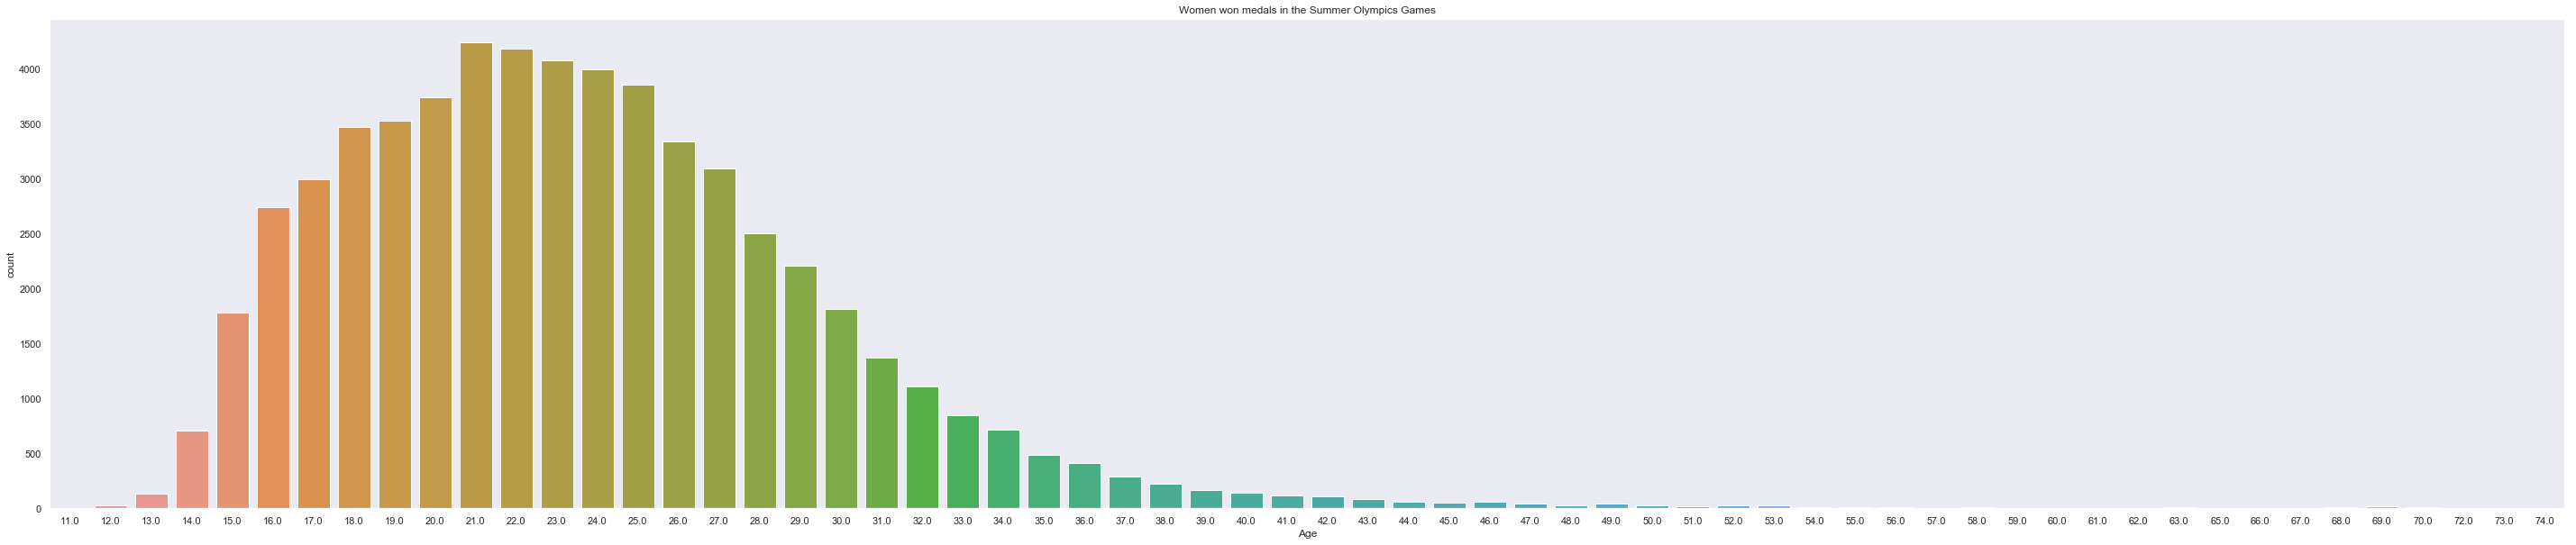

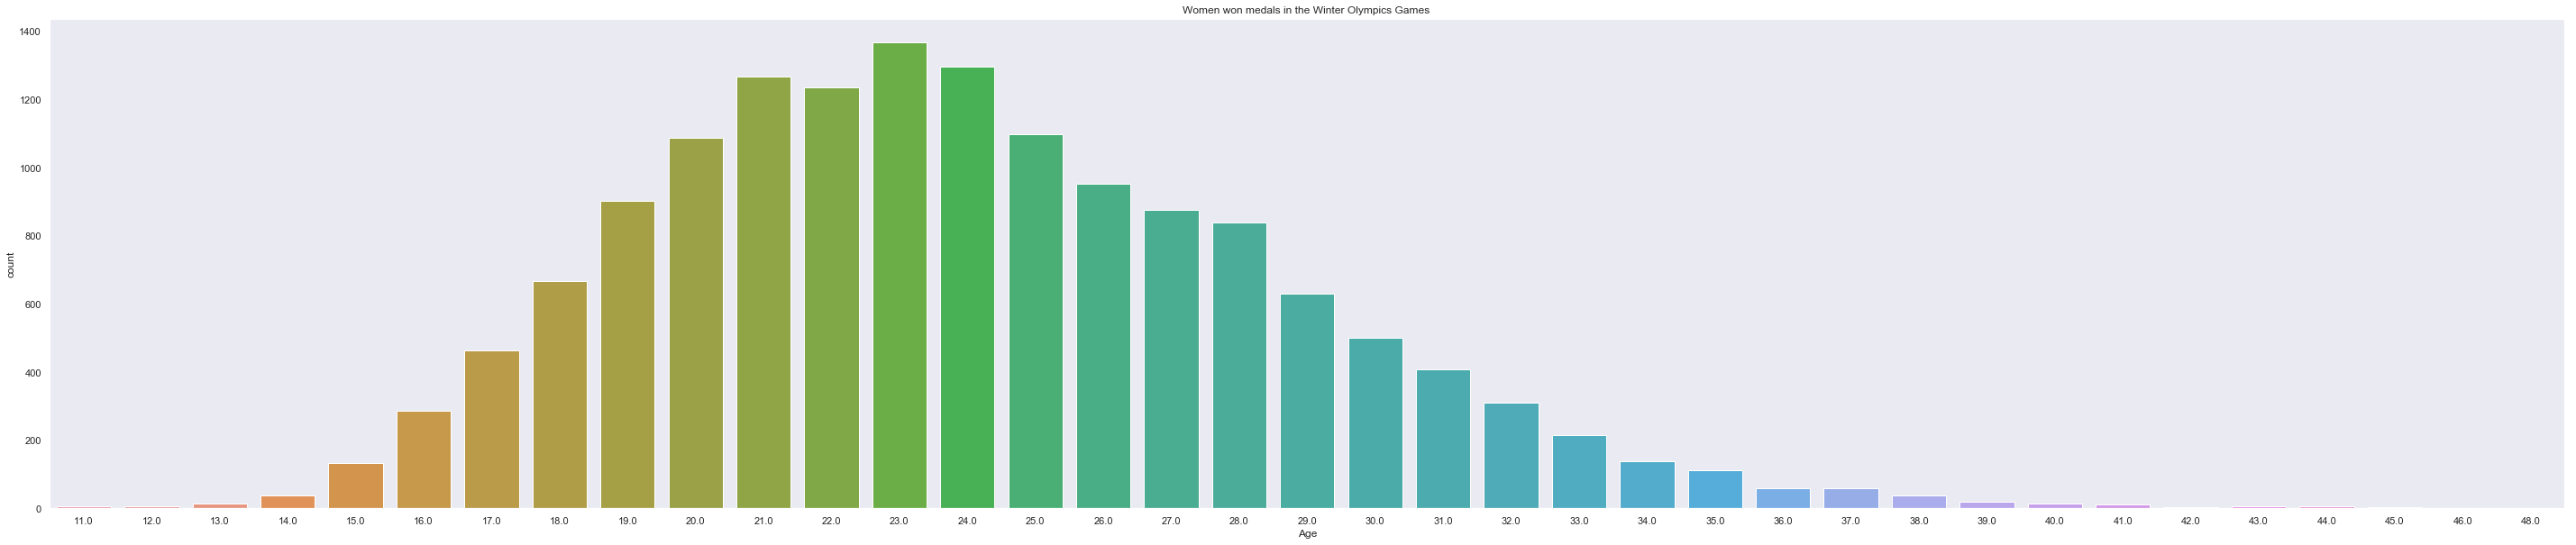

In [6]:
sns.set(style="dark")
plt.figure(figsize=(50, 10))
sns.countplot(x='Age', data=Olympics)
plt.title('Women won medals in the Summer Olympics Games')
sns.set(style="dark")
plt.figure(figsize=(50, 10))
sns.countplot(x='Age', data=Olympic)
plt.title('Women won medals in the Winter Olympics Games ')

#     Variation of Ages of Female Athletes

Text(0.5,1,'Variation of Age for Female Athletes over time')

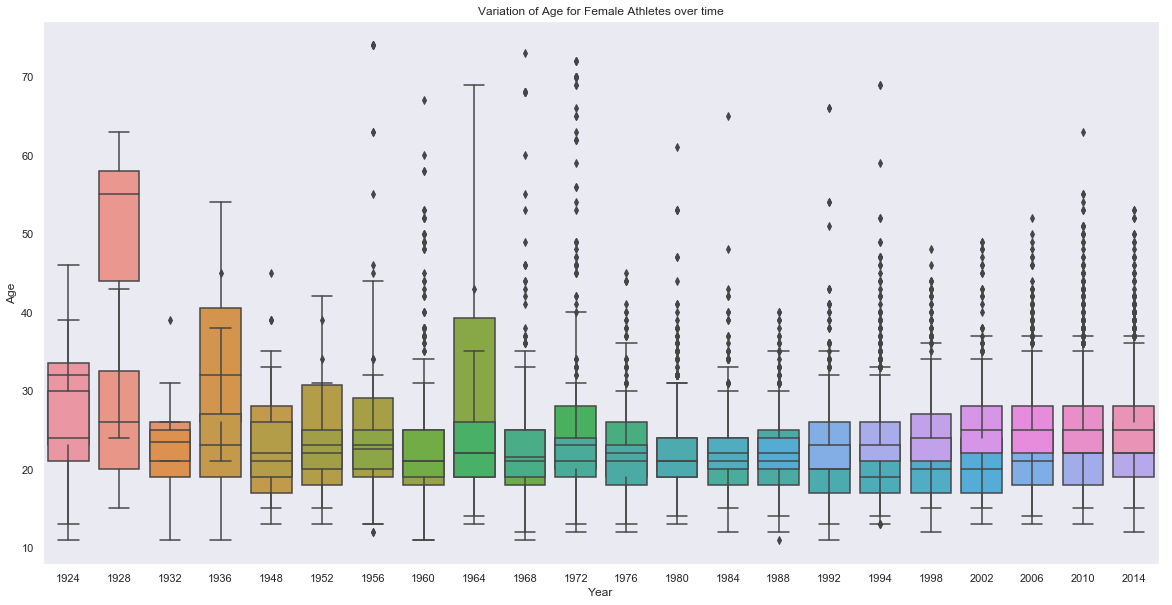

In [7]:
plt.figure(figsize=(20, 10))
sns.boxplot('Year', 'Age', data=Olympics)
sns.boxplot('Year', 'Age', data=Olympic)
plt.title('Variation of Age for Female Athletes over time')

# INDIA

Text(0.5,1,'Distribution of participation over Year')

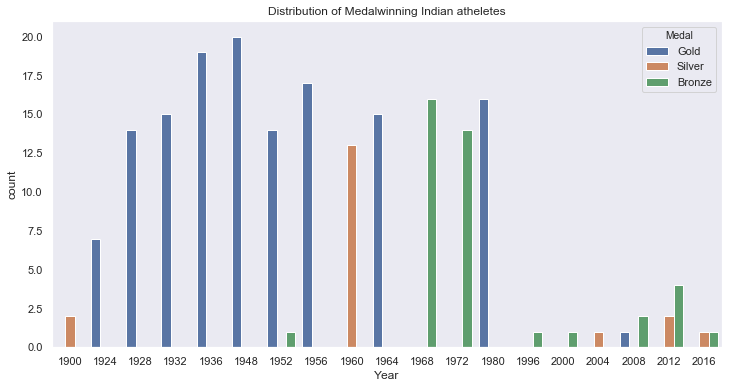

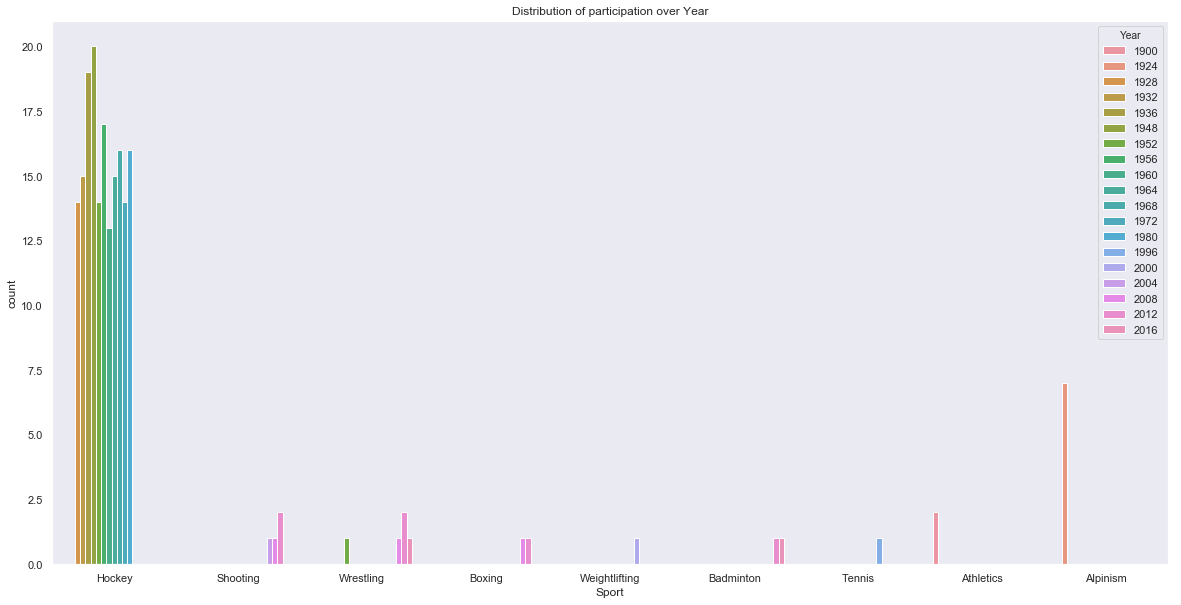

In [8]:
dataIndia = merged[merged.NOC == 'IND']
dataIndia = dataIndia[dataIndia.Medal.notnull()]
plt.figure(figsize=(12, 6))
plt.tight_layout()
sns.countplot(x='Year', hue='Medal', data= dataIndia)
plt.title('Distribution of Medalwinning Indian atheletes')
plt.figure(figsize=(20, 10))
plt.tight_layout()
sns.countplot(x='Sport',hue='Year', data= dataIndia)
plt.title('Distribution of participation over Year')

# "rate of participation in the Olympic"

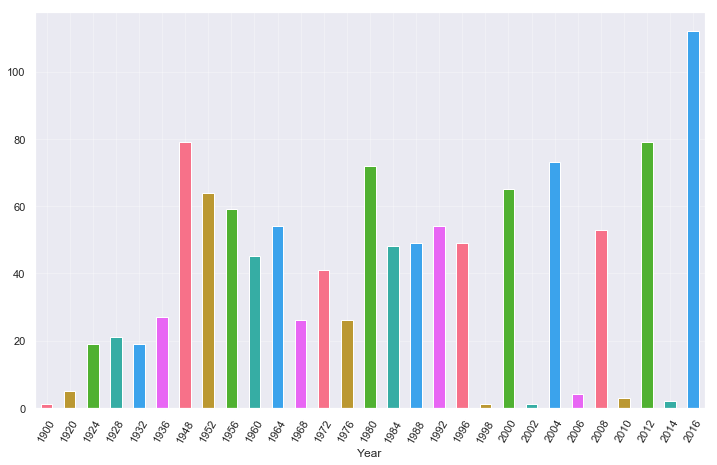

In [29]:
data_team=data[data.Team=="India"]
data_India=data_team.loc[:,["ID","Year"]]
plt.figure(figsize=(12,16))
plt.subplot(211)
India = data_India.groupby("Year")["ID"].nunique().plot(kind = "bar",
                                                 color = sns.color_palette("husl"),
                                                 linewidth = 1)
plt.xticks(rotation = 60)
plt.grid(True,alpha=.3)
plt.show()


# Relationship between participating and winning

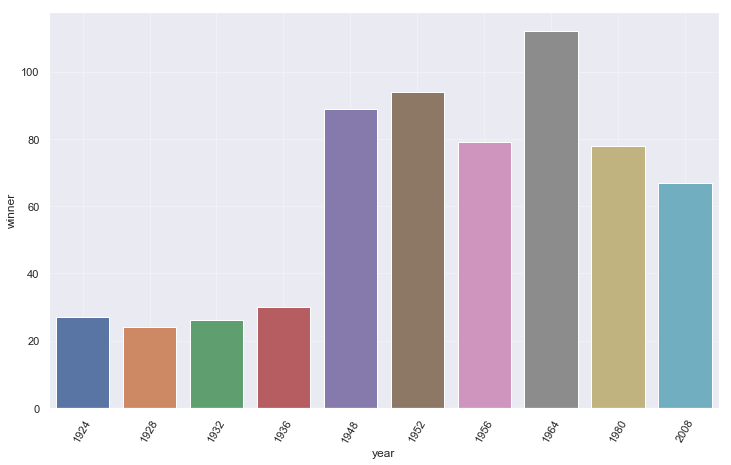

In [47]:
data_gold=data[np.logical_and(data['Team']=="India",data['Medal']=="Gold")]
data1=data_India["Year"].value_counts(dropna=False).to_frame()
data2=data_gold["Year"].value_counts(dropna=False).to_frame()
data_percent=pd.concat([data1,data2],axis=1)
data_percent["year"]=data_percent.index
names=["participating","winner","year"]
data_percent.columns=names
data_percent.dropna(inplace=True)
data_percent.index=range(0,10)

plt.figure(figsize=(12,16))
plt.subplot(211)    

ax = sns.barplot(x="year", y="participating", data=data_percent)
ax.set(ylabel="winner")

plt.xticks(rotation = 60)
plt.grid(True,alpha=.3)
plt.show()

# Are  athletes  won medals in multiple sports?

In [11]:
!pip install UpSetPlot
!pip install geopy
import pandas as pd
pd.set_option('expand_frame_repr', False)
pd.set_option('max_colwidth', 140)
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
import upsetplot

from geopy.geocoders import*
geolocator = Nominatim(user_agent="sagnik")
from geopy.extra.rate_limiter import RateLimiter
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=2)
import scipy as sp

In [12]:
# Keep distinct pairs of athlete IDs and Season they participated in
athlete_and_season = data[['ID', 'Season']].drop_duplicates()
# Convert data frame to wide format
athlete_and_season['Participated'] = True
athlete_and_season_wide = athlete_and_season.pivot(index='ID', columns='Season', values='Participated').fillna(False)
# Construct the series for UpSet plotting
columns = list(athlete_and_season_wide.columns)
athlete_and_season_upset = athlete_and_season_wide.groupby(columns).size()

In [13]:
athlete_and_season_wide = athlete_and_season_wide.reset_index()
double_season_athletes = athlete_and_season_wide[(athlete_and_season_wide['Summer']==True) & (athlete_and_season_wide['Winter']==True)][['ID']]
double_season_data = pd.merge(double_season_athletes, data, on = 'ID')

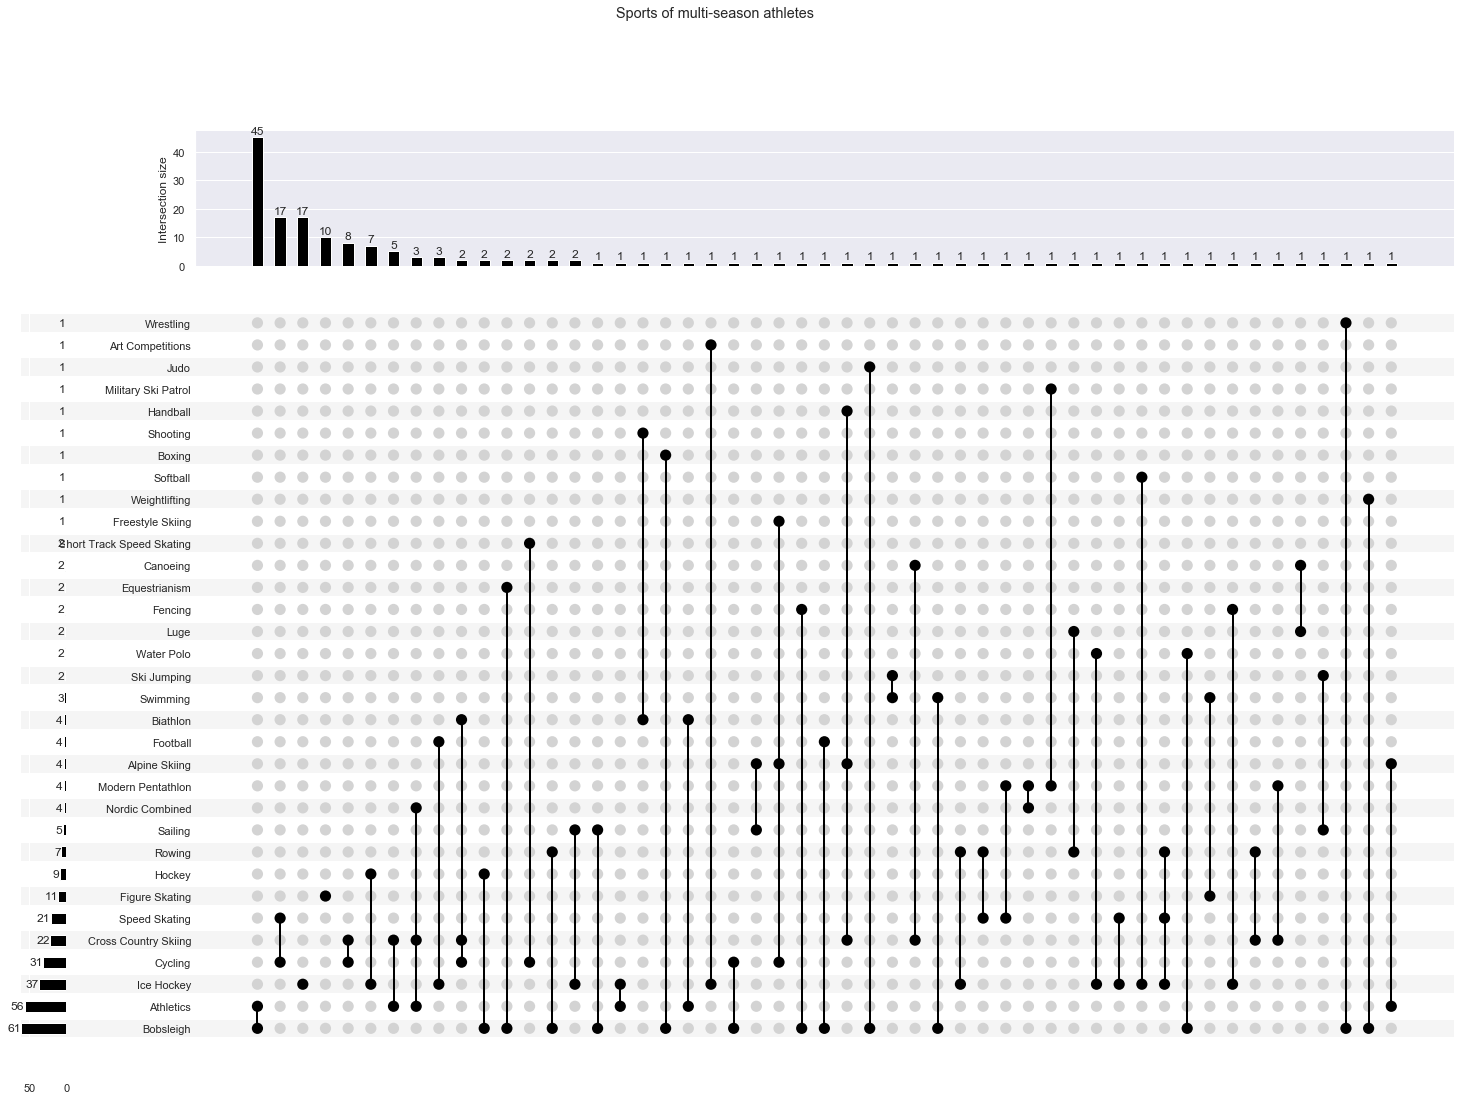

In [14]:
# Keep distinct pairs of athlete IDs and the sports they competed in
double_season_sport = double_season_data[['ID', 'Sport']].drop_duplicates()
# Convert data frame to wide format
double_season_sport['Participated'] = True
double_season_sport_wide = double_season_sport.pivot(index='ID', columns='Sport', values='Participated').fillna(False)
# Construct the series for UpSet plotting
columns = list(double_season_sport_wide.columns)
double_season_sport_upset = double_season_sport_wide.groupby(columns).size()
# UpSet plot
upsetplot.plot(double_season_sport_upset, sort_by = "cardinality", show_counts='%d') 
plt.suptitle('Sports of multi-season athletes')
plt.show() 

Conclusions

The most popular combination of sports that athletes participate in is Bobsleigh in Winter and Athletics in Summer.
The second most popular combination of sports is Speed Skating in Winter and Cycling in Summer.
Some athletes participate in both Summer and Winter events but compete in only one sport - Ice Hockey or Figure Skating - meaning that these two sports are played in both Summer and Winter Games.